In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_kaoncontam = pd.read_csv('kaoncontam.inp',header=None,delimiter=r"\s+")
#df.columns = ["type","length","kaon_decay_potion_leftdp","kaon_decay_potion_rightdp","mu_left","mu_right","pi_left","pi_right","kaon_portion_left","kaon_portion_right"]
df_kaoncontam.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,0.0115,0.0088,0.0066,0.0054,0.0038,0.0029,0.0017,0.0011,0.0006,0.0005
1,2,0.0074,0.0059,0.0049,0.0043,0.0033,0.0026,0.0016,0.0010,0.0006,0.0005
2,3,0.0056,0.0045,0.0037,0.0033,0.0026,0.0022,0.0015,0.0009,0.0006,0.0005
3,4,0.0046,0.0038,0.0032,0.0029,0.0023,0.0020,0.0013,0.0009,0.0006,0.0005
4,5,0.0033,0.0030,0.0026,0.0023,0.0020,0.0016,0.0012,0.0008,0.0006,0.0004


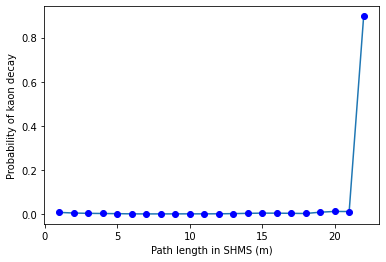

In [2]:
plt.plot(df_kaoncontam[0],df_kaoncontam[2])
plt.plot(df_kaoncontam[0],df_kaoncontam[2],'bo')
#plt.ylim(0,0.1)
plt.xlabel('Path length in SHMS (m)')
plt.ylabel('Probability of kaon decay')
plt.savefig('notebook_results/kaon_decay_contam_all.pdf')

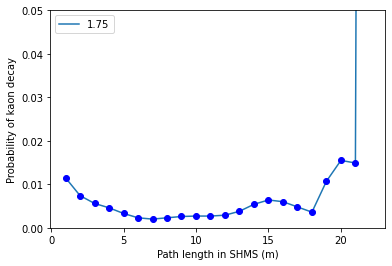

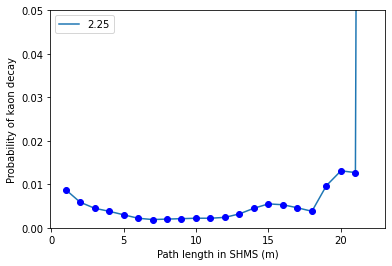

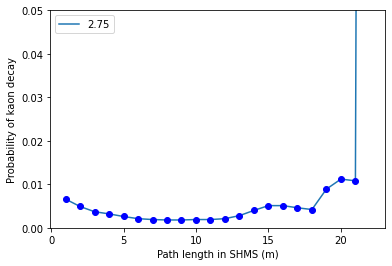

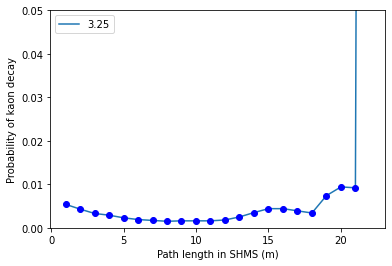

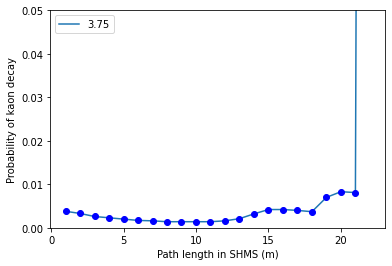

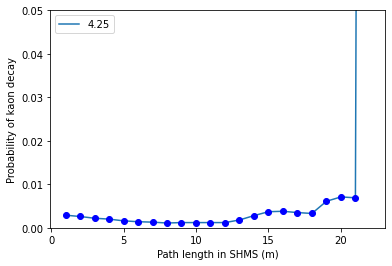

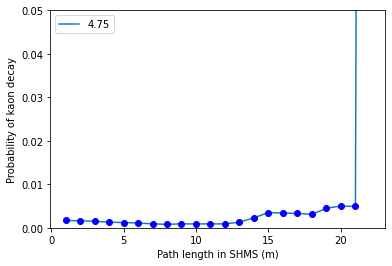

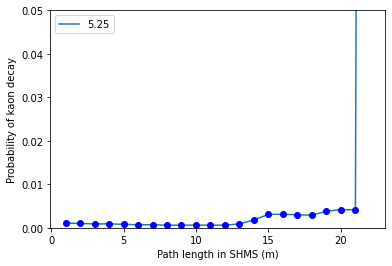

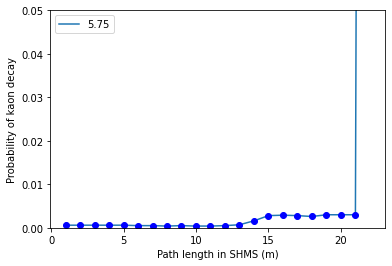

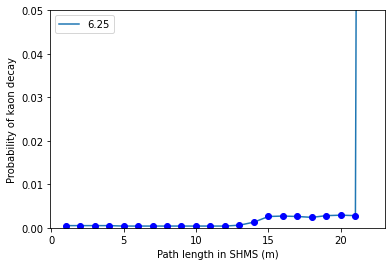

In [3]:
for i in range(1,11):
    shmsp = 1.75+0.5*(i-1)
    fig = plt.figure()
    plt.plot(df_kaoncontam[0],df_kaoncontam[i],label = shmsp)
    plt.plot(df_kaoncontam[0],df_kaoncontam[i],'bo')
    plt.ylim(0,0.05)
    plt.xlabel('Path length in SHMS (m)')
    plt.ylabel('Probability of kaon decay')
    plt.legend()
    plt.savefig(f'notebook_results/kaon_decay_contam_{i}.pdf')

In [4]:
shmsp = 2.3
i_momentum = int((shmsp-1.25)/0.5)
print(i_momentum)
for i in range(0,22):
    print(df_kaoncontam[0][i])
    print(df_kaoncontam[i_momentum][i])
print(df_kaoncontam[i_momentum][21])

2
1
0.0088
2
0.0059
3
0.0045
4
0.0038
5
0.003
6
0.0022
7
0.0019
8
0.002
9
0.0021
10
0.0022
11
0.0022
12
0.0024
13
0.0032
14
0.0045
15
0.0055
16
0.0053
17
0.0046
18
0.0038
19
0.0097
20
0.0131
21
0.0127
22
0.8964
0.8964


In [5]:
import math
c = 299792458
shms_length = 21.2
def t_pi(shmsp):
    m_pi = 0.139
    return (shms_length*math.sqrt(shmsp**2+m_pi**2)*1e9)/(c*shmsp)
def t_K(shmsp):
    m_K = 0.493
    return (shms_length*math.sqrt(shmsp**2+m_K**2)*1e9)/(c*shmsp)
def t_pi_fromkaondecay(shmsp,position,pion_peak):
    m_pi = 0.139
    m_K = 0.493
    kaon_fly_time = position*math.sqrt(shmsp**2+m_K**2)*1e9/(c*shmsp)
    pi_fly_time = (shms_length-position)*math.sqrt(shmsp**2+m_pi**2)*1e9/(c*shmsp)
    sum_time = kaon_fly_time+pi_fly_time
    real_pi_time = t_pi(shmsp)-pion_peak
    return sum_time-real_pi_time
def gaus_fun_kaonNodecay(rftime,A_K,pion_peak,sigma_K,shmsp):
    kaon_nodecay_peak = t_K(shmsp)-t_pi(shmsp)+pion_peak
    #print(kaon_nodecay_peak)
    gaus_shape = A_K*math.exp(-0.5*((rftime-kaon_nodecay_peak)/sigma_K)**2)+A_K/15*math.exp(-0.5*((rftime-kaon_nodecay_peak)/(2*sigma_K))**2)
    return gaus_shape
def gaus_fun_pion_kaondecay(rftime,shmsp,position,pion_peak,A_pifromK):
    pi_fromkaondecay_peak = t_pi_fromkaondecay(shmsp,position,pion_peak)
    gaus_shape = A_pifromK*math.exp(-0.5*((rftime-pi_fromkaondecay_peak)/0.2)**2)+A_pifromK/15*math.exp(-0.5*((rftime-pi_fromkaondecay_peak)/0.4)**2)
    return gaus_shape
def kaon_part(rftime,A_K,sigma_K,pion_peak,shmsp):
    kaonnodecay = gaus_fun_kaonNodecay(rftime,A_K,pion_peak,sigma_K,shmsp)
    i_momentum = int((shmsp-1.25)/0.5)
    all_kaon = kaonnodecay
    for i in range(0,21):
        position = df_kaoncontam[0][i]
        A_pifromK = A_K*df_kaoncontam[i_momentum][i]/df_kaoncontam[i_momentum][21]
        pion_fromkaondecay = gaus_fun_pion_kaondecay(rftime,shmsp,position,pion_peak,A_pifromK)
        all_kaon+=pion_fromkaondecay
    return all_kaon

def kaon_part_onlykaondecay(rftime,A_K,sigma_K,pion_peak,shmsp):
    i_momentum = int((shmsp-1.25)/0.5)
    all_kaon = 0
    for i in range(0,21):
        position = df_kaoncontam[0][i]
        A_pifromK = A_K*df_kaoncontam[i_momentum][i]/df_kaoncontam[i_momentum][21]
        pion_fromkaondecay = gaus_fun_pion_kaondecay(rftime,shmsp,position,pion_peak,A_pifromK)
        all_kaon+=pion_fromkaondecay
    return all_kaon

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15580/295662947.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(rftimes,kaon_all,color = 'blue',lineStyle = '-',label = 'SHMS P is '+str(shmsp))
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15580/295662947.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(rftimes,kaon_onlykaondecay,color = 'magenta',lineStyle = '--')
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_15580/295662947.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(rftimes,kaon_nodecay,color = 'magenta',lineStyle = '-.')


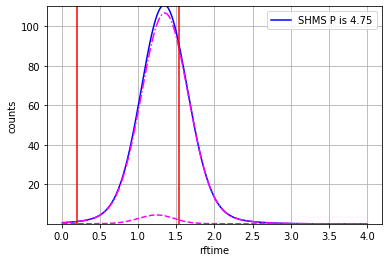

In [6]:
A_K = 100
sigma_K = 0.3
pion_peak = 1
shmsp = 4.75
rftimes = np.arange(0.01,4,0.01)
kaon_all = []
kaon_onlykaondecay = []
kaon_nodecay = []
for rftime in np.arange(0.01,4,0.01):
    kaon_all.append(kaon_part(rftime,A_K,sigma_K,pion_peak,shmsp))
    kaon_onlykaondecay.append(kaon_part_onlykaondecay(rftime,A_K,sigma_K,pion_peak,shmsp))
    kaon_nodecay.append(gaus_fun_kaonNodecay(rftime,A_K,pion_peak,sigma_K,shmsp))
    #print(kaon_all)
plt.plot(rftimes,kaon_all,color = 'blue',lineStyle = '-',label = 'SHMS P is '+str(shmsp))
plt.plot(rftimes,kaon_onlykaondecay,color = 'magenta',lineStyle = '--')
plt.plot(rftimes,kaon_nodecay,color = 'magenta',lineStyle = '-.')
plt.grid()
plt.xlabel('rftime')
plt.ylabel('counts')
plt.legend()
#plt.yscale('log')
plt.ylim(0.01,110)
plt.axvline(x = 0.2, color = 'r', label = 'rf cut left')
plt.axvline(x = 1.54, color = 'r', label = 'rf cut right')
plt.savefig('notebook_results/kaon_inrf2.pdf')

In [7]:
kaons_nodecay = 0
kaons_decay = 0
kaons_all = 0
rf_cut_left = 0.2
rf_cut_right = 4
for rftime in np.linspace(rf_cut_left,rf_cut_right,100):
    kaons_all+=(rf_cut_right-rf_cut_left)/100*(kaon_part(rftime,A_K,sigma_K,pion_peak,shmsp))
    kaons_decay+=(rf_cut_right-rf_cut_left)/100*(kaon_part_onlykaondecay(rftime,A_K,sigma_K,pion_peak,shmsp))
    kaons_nodecay+=(rf_cut_right-rf_cut_left)/100*(gaus_fun_kaonNodecay(rftime,A_K,pion_peak,sigma_K,shmsp))
print(kaons_all)
print(kaons_decay)
print(kaons_nodecay)

86.76290589383079
2.6484402747297655
84.11446561910105


In [8]:
#counts of kaon decayed particle included in the rfcut, devided by the nodecay kaons

def Kaondecay_inrfcut_onlydecay(rfcut_left,rfcut_right,shmsp):
    A_K = 100
    sigma_K = 0.3
    pion_peak = 1
    kaons_nodecay = 0
    kaons_decay = 0
    for rftime in np.arange(0,4,0.01):
        kaons_nodecay+=0.01*(gaus_fun_kaonNodecay(rftime,A_K,pion_peak,sigma_K,shmsp))
    for rftime in np.arange(rfcut_left,rfcut_right,0.01):
        kaons_decay+=0.01*(kaon_part_onlykaondecay(rftime,A_K,sigma_K,pion_peak,shmsp))
    return kaons_decay/kaons_nodecay
def Kaondecay_inrfcut_withnodecay(rfcut_left,rfcut_right,shmsp):
    A_K = 100
    sigma_K = 0.3
    pion_peak = 1
    kaons_nodecay = 0
    kaons_decay = 0
    for rftime in np.arange(0,4,0.01):
        kaons_nodecay+=0.01*(gaus_fun_kaonNodecay(rftime,A_K,pion_peak,sigma_K,shmsp))
    for rftime in np.arange(rfcut_left,rfcut_right,0.01):
        kaons_decay+=0.01*(kaon_part(rftime,A_K,sigma_K,pion_peak,shmsp))
    return kaons_decay/kaons_nodecay




In [9]:
rfcut_left = 0.5
rfcut_right = 1.5
print('rfcut left and right:',rfcut_left,rfcut_right)
print('SHMSp noHGCcut withHGCcut')
for i in range(0,9):
    shmsp = 1.75+0.5*i
    print(shmsp,end = ' ')
    print(f"{Kaondecay_inrfcut_withnodecay(rfcut_left,rfcut_right,shmsp):.6f}",end = ' ')
    print(f"{Kaondecay_inrfcut_onlydecay(rfcut_left,rfcut_right,shmsp):.6f}")

rfcut left and right: 0.5 1.5
SHMSp noHGCcut withHGCcut
1.75 0.021102 0.021057
2.25 0.025451 0.020524
2.75 0.075158 0.022991
3.25 0.245501 0.028722
3.75 0.448203 0.033278
4.25 0.598845 0.032978
4.75 0.692348 0.026987
5.25 0.751410 0.022280
5.75 0.788537 0.018037


for rf_right cut at the middle of kaon and pion peak
SHMSP,rf_right,kaon_peak,prob_inrf
2.75  4.000    1.983     0.069997
3.25  4.000    1.706     0.139146
3.75  4.000    1.531     0.202927
4.25  4.000    1.414     0.255240
4.75  4.000    1.331     0.298368
5.25  4.000    1.271     0.330864
5.75  4.000    1.226     0.359124
[-0.01805906  0.24966336 -0.48029481]


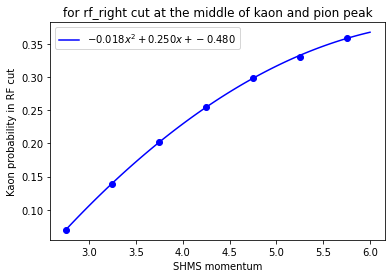

In [10]:
c = 299792458
def t_pi(shms_p):
    m_pi = 0.139
    return (20.1*math.sqrt(shms_p**2+m_pi**2)*1e9)/(c*shms_p)
def t_K(shms_p):
    m_K = 0.493
    return (20.1*math.sqrt(shms_p**2+m_K**2)*1e9)/(c*shms_p)
def t_proton(shms_p):
    m_proton = 0.938
    return ((20.1*math.sqrt(shms_p**2+m_proton**2)*1e9)/(c*shms_p))
rfcut_left = 0.2
shmsps = []
probs = []
print('for rf_right cut at the middle of kaon and pion peak')
print('SHMSP,rf_right,kaon_peak,prob_inrf')
for i in range(0,7):
    shmsp = 2.75+0.5*i
    rfcut_right = (t_K(shmsp)-t_pi(shmsp))/2+1
    print(shmsp,end = '  ')
    print(f'{rf_cut_right:.3f}',end = '    ')
    kaon_peak = (t_K(shmsp)-t_pi(shmsp))+1
    print(f'{kaon_peak:.3f}',end = '     ')
    print(f"{Kaondecay_inrfcut_withnodecay(rfcut_left,rfcut_right,shmsp):.6f}")
    prob = Kaondecay_inrfcut_withnodecay(rfcut_left,rfcut_right,shmsp)
    shmsps.append(shmsp)
    probs.append(prob)
plt.plot(shmsps,probs,'bo')

probs_fit = np.polyfit(shmsps,probs,2)
print(probs_fit)
x_fit = np.linspace(2.75,6,100)
y_fit = probs_fit[0]*x_fit**2+probs_fit[1]*x_fit**1+probs_fit[2]
plt.plot(x_fit,y_fit,color = 'blue',label = f'${probs_fit[0]:.3f}x^2+{probs_fit[1]:.3f}x+{probs_fit[2]:.3f}$')
plt.xlabel('SHMS momentum')
plt.ylabel('Kaon probability in RF cut')
plt.title('for rf_right cut at the middle of kaon and pion peak')
plt.legend()
plt.savefig('notebook_results/Kaon_inrfcut_vary.pdf')

for rfcut 0.2-1.54
SHMSP,rf_right,kaon_peak,prob_inrf
2.75  4.000    1.983     0.086200
3.25  4.000    1.706     0.296203
3.75  4.000    1.531     0.503946
4.25  4.000    1.414     0.646120
4.75  4.000    1.331     0.734973
5.25  4.000    1.271     0.790773
5.75  4.000    1.226     0.827021
[-0.08262502  0.94821477 -1.89983972]


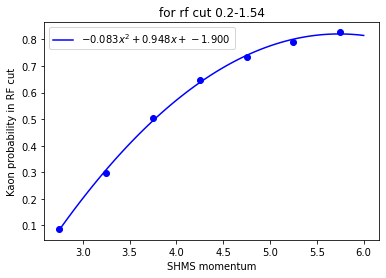

In [11]:

rfcut_left = 0.2
shmsps = []
probs = []
print('for rfcut 0.2-1.54')
print('SHMSP,rf_right,kaon_peak,prob_inrf')
for i in range(0,7):
    shmsp = 2.75+0.5*i
    rfcut_right = 1.54
    print(shmsp,end = '  ')
    print(f'{rf_cut_right:.3f}',end = '    ')
    kaon_peak = (t_K(shmsp)-t_pi(shmsp))+1
    print(f'{kaon_peak:.3f}',end = '     ')
    print(f"{Kaondecay_inrfcut_withnodecay(rfcut_left,rfcut_right,shmsp):.6f}")
    prob = Kaondecay_inrfcut_withnodecay(rfcut_left,rfcut_right,shmsp)
    shmsps.append(shmsp)
    probs.append(prob)
plt.plot(shmsps,probs,'bo')

probs_fit = np.polyfit(shmsps,probs,2)
print(probs_fit)
x_fit = np.linspace(2.75,6,100)
y_fit = probs_fit[0]*x_fit**2+probs_fit[1]*x_fit**1+probs_fit[2]
plt.plot(x_fit,y_fit,color = 'blue',label = f'${probs_fit[0]:.3f}x^2+{probs_fit[1]:.3f}x+{probs_fit[2]:.3f}$')
plt.xlabel('SHMS momentum')
plt.ylabel('Kaon probability in RF cut')
plt.title('for rf cut 0.2-1.54')
plt.legend()
plt.savefig('notebook_results/Kaon_inrfcut.pdf')

In [12]:
def Get_Kpi_ratio(shmsp):
    Kpi_ratio = -0.22+0.08502*shmsp
    if(Kpi_ratio<0):
        Kpi_ratio = 0
    return Kpi_ratio
rfcut_left = 0.5
rfcut_right = 1.5
print('rfcut left and right:',rfcut_left,rfcut_right)
print("SHMSp noHGC withHGCcut")
for i in range(0,9):
    shmsp = 1.75+0.5*i
    print(shmsp,end = ' ')
    print(f"{Get_Kpi_ratio(shmsp)*Kaondecay_inrfcut_withnodecay(rfcut_left,rfcut_right,shmsp):.4f}",end = ' ')
    print(f"{Get_Kpi_ratio(shmsp)*Kaondecay_inrfcut_onlydecay(rfcut_left,rfcut_right,shmsp):.4f}")

rfcut left and right: 0.5 1.5
SHMSp noHGC withHGCcut
1.75 0.0000 0.0000
2.25 0.0000 0.0000
2.75 0.0010 0.0000
3.25 0.0142 0.0000
3.75 0.0445 0.0000
4.25 0.0838 0.0000
4.75 0.1259 0.0000
5.25 0.1681 0.0000
5.75 0.2098 0.0000


[-0.01506362  0.05755041  0.94920865]
[-1.17734375e-16  1.00000000e+00]


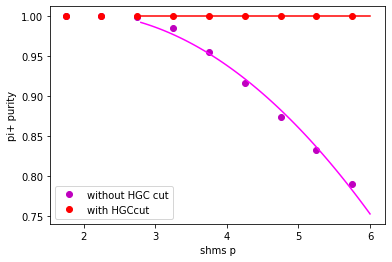

In [13]:
rfcut_left = 0.5
rfcut_right = 1.5
pi_purity_noHGC = []
pi_purity_HGC = []
shms_ps = []
for i in range(0,9):
    shmsp = 1.75+0.5*i
    shms_ps.append(shmsp)
    pi_purity_noHGC.append(1-Get_Kpi_ratio(shmsp)*Kaondecay_inrfcut_withnodecay(rfcut_left,rfcut_right,shmsp))
    pi_purity_HGC.append(1-Get_Kpi_ratio(shmsp)*Kaondecay_inrfcut_onlydecay(rfcut_left,rfcut_right,shmsp))
plt.plot(shms_ps,pi_purity_noHGC,"mo",label = 'without HGC cut')
plt.plot(shms_ps,pi_purity_HGC,"ro",label = 'with HGCcut')

plt.legend()
plt.xlabel('shms p')
plt.ylabel('pi+ purity')

pi_purity_fit = np.polyfit(shms_ps,pi_purity_noHGC,2)
print(pi_purity_fit)
x_fit = np.linspace(2.8,6,100)
y_fit = pi_purity_fit[0]*x_fit**2+pi_purity_fit[1]*x_fit+pi_purity_fit[2]
plt.plot(x_fit,y_fit,color = 'magenta',label = 'Fitting')
pi_purity_fit_withHGC = np.polyfit(shms_ps,pi_purity_HGC,1)
y_withHGC_fit = pi_purity_fit_withHGC[0]*x_fit+pi_purity_fit_withHGC[1]
plt.plot(x_fit,y_withHGC_fit,color = 'red')
print(pi_purity_fit_withHGC)
plt.savefig('notebook_results/pi_plus_purity.pdf')

In [14]:
def Get_pos_pi_purity(shms_p):
    pi_purity = -0.01532706*shms_p**2+0.05889954*shms_p+0.94763371
    return pi_purity
def Get_neg_pi_purity(shms_p):
    pi_purity = -0.00156196*shms_p+1.00310863